# Support Vector Machine
- XOR or “exclusive or”
- An XOR function should return a true value if the two inputs are not equal and a false value if they are equal.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [10]:
import os
imagePath = os.path.join(os.getcwd(),'Images')
if (not(os.path.isdir(imagePath))):
    os.mkdir(imagePath)

In [11]:
# Create data
def create_XOR_data(filename=""):
    np.random.seed(1)
    X_xor = np.random.randn(200, 2)
    y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
    y_xor = np.where(y_xor, 1, -1)
    # Plot data
    fig1, ax1 = plt.subplots(1, figsize=(5, 5))
    ax1.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], marker="s", label="-1")
    ax1.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], marker="x", label="1")
    ax1.set_xlim([-3, 3])
    ax1.set_ylim([-3, 3])
    ax1.legend()

    if filename:
        fig1.savefig(filename, dpi=300)
        
    return (X_xor, y_xor)

In [12]:
def plot_result(X, y, svm, filename="", title=""):
    # Plotting result
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    markers = ("s", "^")
    linestyles = (":", "--")
    fig2, ax2 = plt.subplots(1, figsize=(5, 5))
    ax2.contourf(xx1, xx2, Z, alpha=0.4, cmap="Set3")
    for idx, cl in enumerate(np.unique(y)):
        ax2.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.6,
            edgecolor="black",
            cmap="Set3",
            marker=markers[idx],
            label=cl,
        )
    if (title):
        ax2.set_title(title)
    ax2.set_xlim([xx1.min(), xx1.max()])
    ax2.set_ylim([xx2.min(), xx2.max()])
    ax2.set_xlabel("X1")
    ax2.set_ylabel("X2")
    ax2.legend()
    
    if (filename):
        fig2.savefig(filename, dpi=300)


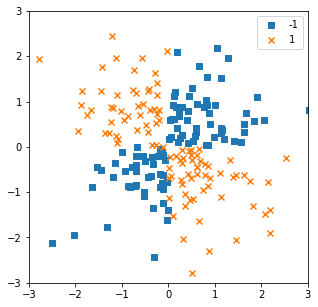

In [13]:
# Create XOR data
X, y = create_XOR_data()

In [14]:
paramSetAll = {
    "ex1": {"gamma": 0.01, "C": 10},
    "ex2": {"gamma": 0.1, "C": 10},
    "ex3": {"gamma": 1, "C": 10},
    "ex4": {"gamma": 10, "C": 10},
    "ex5": {"gamma": 0.1, "C": 0.01},
    "ex6": {"gamma": 0.1, "C": 1},
    "ex7": {"gamma": 0.1, "C": 100},
    "ex8": {"gamma": 0.1, "C": 1000},
}

In [15]:
cl = list(range(1,9))
ca = [ f'ex{i}' for i in cl]
paramSet = { k: paramSetAll[k] for k in ca} 
#print(paramSet)

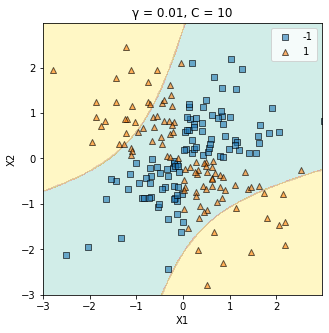

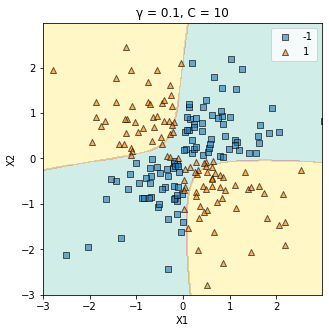

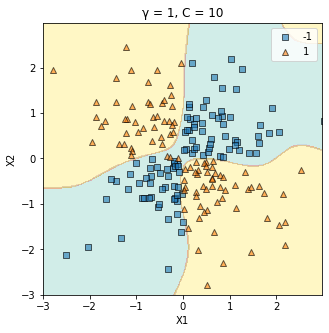

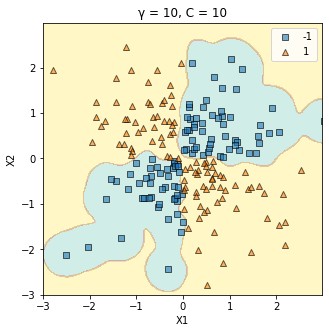

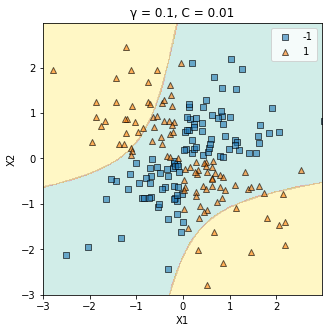

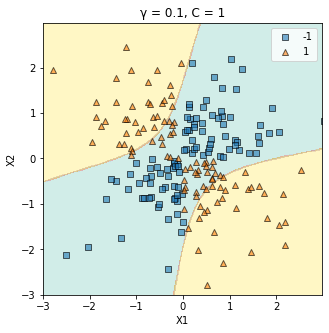

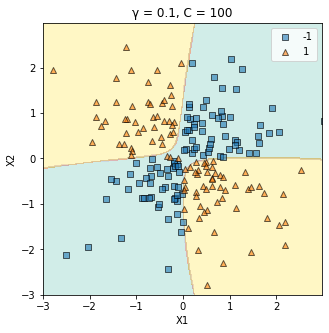

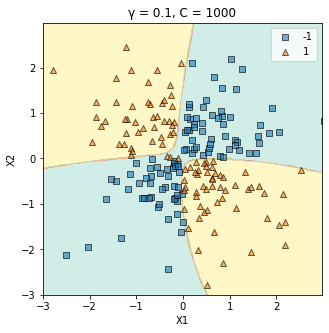

In [16]:
for ex, param in paramSet.items():
    # Extract parameteres
    gamma = param['gamma']
    C = param['C']
    # Creating objects
    svm = SVC(kernel="rbf", random_state=1, gamma=gamma, C=C)
    # Training
    svm.fit(X, y)
    # Plot result
    title = f"γ = {gamma}, C = {C}"
    filename = f"Images/T32_XOR_{ex}.png"
    plot_result(X, y, svm, filename, title)